In [1]:
from pandas import DataFrame
import pandas as pd

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time

In [3]:
n = 4
A = np.random.rand(n,n)
A_inv = np.linalg.inv(A)

u = np.random.rand(n,1)
v = np.random.rand(n,1)

In [4]:
def numpy_version(A, u, v):
    return np.linalg.inv(A + u @ v.T)

In [5]:
def sherman_morrison(A_inv, u, v):
    return A_inv - (A_inv @ u @ v.T @ A_inv) / (1 + (v.T @ A_inv) @ u)

In [6]:
def sherman_morrison_modified(A_inv, u, v):
    return A_inv - (A_inv @ (u @ v.T) @ A_inv) / (1 + (v.T @ A_inv) @ u)

In [41]:
numpy_version(A_inv, u, v)

array([[ 0.34838508, -0.09396138,  0.66457143,  0.20276637],
       [ 0.18580085,  0.23106258,  0.51695105,  0.60156599],
       [ 0.47957925,  0.58481942, -0.04999544,  0.15980784],
       [ 0.16428502,  0.50061034, -0.0910573 ,  0.00166145]])

In [42]:
sherman_morrison(A, u, v)

array([[ 0.34838508, -0.09396138,  0.66457143,  0.20276637],
       [ 0.18580085,  0.23106258,  0.51695105,  0.60156599],
       [ 0.47957925,  0.58481942, -0.04999544,  0.15980784],
       [ 0.16428502,  0.50061034, -0.0910573 ,  0.00166145]])

In [43]:
sherman_morrison_modified(A, u, v)

array([[ 0.34838508, -0.09396138,  0.66457143,  0.20276637],
       [ 0.18580085,  0.23106258,  0.51695105,  0.60156599],
       [ 0.47957925,  0.58481942, -0.04999544,  0.15980784],
       [ 0.16428502,  0.50061034, -0.0910573 ,  0.00166145]])

In [10]:
def run_test(n, amount_of_tests = 10):
    times = [[],[],[]]
    for i in range(amount_of_tests):
        A = np.random.rand(n,n)
        A_inv = np.linalg.inv(A)

        u = np.random.rand(n,1)
        v = np.random.rand(n,1)

        t = time()
        numpy_version(A, u, v)
        times[0].append(time() - t) 
        
        A_inv = np.linalg.inv(A)
        
        t = time()
        sherman_morrison(A_inv, u ,v)
        times[1].append(time() - t) 

        t = time()
        sherman_morrison_modified(A_inv, u, v)
        times[2].append(time() - t) 
    
        
    return times

In [12]:
def run_tests(start = 25, step = 25, k = 75, amount = 10):
    times = []
    amounts = []
    n = start
    for i in range(k):
        times.append(run_test(n, amount))
        amounts.append(n)
        n += step
    return times, amounts

In [13]:
n = 50

start = 50
end = 2000

step = int((end - start)/n)


r, am = run_tests(start, step, n)

In [14]:
nump, sh1, sh2 = [], [], []
for i in range(len(r)):
    nump.append(r[i][0])
    sh1.append(r[i][1])
    sh2.append(r[i][2])

In [15]:
def to_dataframe(data):
    df = DataFrame(data = data, index=am, columns = [i for i in range(10)])
    df['std'] = df.T.std()
    df['mean'] = df.T.mean()
    return df

nump_df = to_dataframe(nump)
sh1_df = to_dataframe(sh1)
sh2_df = to_dataframe(sh2)

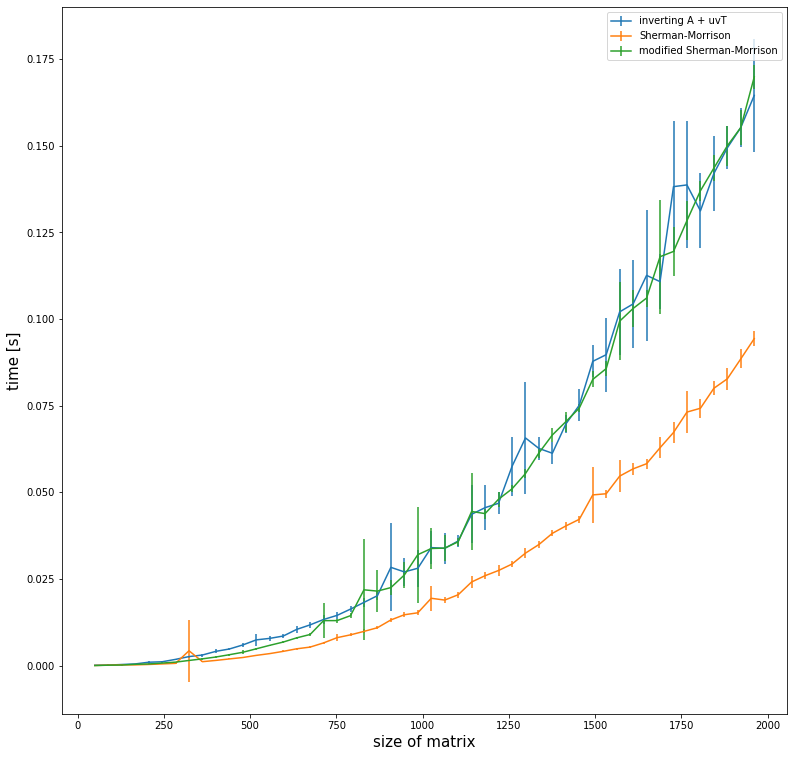

In [25]:
fig , ax = plt.subplots(figsize = (13,13))

nump_df.plot(ax = ax,y = 'mean', yerr = 'std', label = 'inverting A + uvT')
sh1_df.plot(ax = ax, y = 'mean', yerr = 'std', label = 'Sherman-Morrison')
sh2_df.plot(ax = ax, y = 'mean', yerr = 'std', label = 'modified Sherman-Morrison')
plt.xlabel("size of matrix", fontsize = 15)
plt.ylabel("time [s]", fontsize = 15)
plt.show()